### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(20)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
cln_application_df= application_df.drop(["EIN"],axis=1)
cln_application_df.head()
cln_application_df.isnull().sum()

NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [3]:
# Determine the number of unique values in each column.
# Generate our categorical variable list
application_cat = cln_application_df.dtypes[cln_application_df.dtypes == "object"].index.tolist()
cln_application_df[application_cat].nunique()


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
name_type_counts= cln_application_df['NAME'].value_counts()
name_type_counts

PARENT BOOSTER USA INC                                      1260
TOPS CLUB INC                                                765
UNITED STATES BOWLING CONGRESS INC                           700
WASHINGTON STATE UNIVERSITY                                  492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC              408
                                                            ... 
MEACHAM PARK NEIGHBORHOOD IMPROVEMENT ASSOCIATION              1
SOUTHERN REGIONAL RESOURCE CENTER                              1
WYLIE ADVOCATES FOR SENIOR ACTIVITIES INC                      1
ANDERSON UNION HIGH SCHOOL DISTRICT TEACHERS ASSOCIATION       1
PRINCE EDUCATIONAL MEDIA INC                                   1
Name: NAME, Length: 19568, dtype: int64

In [5]:
# Determine which values to replace if counts are less than ...?
replace_name = list (name_type_counts[name_type_counts<75].index) 

# Replace in dataframe
for name in replace_name:
    cln_application_df.NAME = cln_application_df.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
cln_application_df.NAME.value_counts()

Other                                                                 25361
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts= cln_application_df['APPLICATION_TYPE'].value_counts()
app_type_counts


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

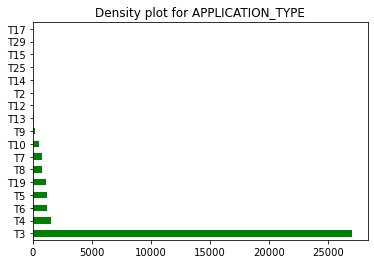

In [7]:
# Visualize the value counts of APPLICATION_TYPE
# app_type_counts.plot.density()
cln_application_df.APPLICATION_TYPE.value_counts().plot(kind="barh", color='green')
plt.title('Density plot for APPLICATION_TYPE')
plt.show()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list (app_type_counts[app_type_counts<50].index) 

# Replace in dataframe
for app in replace_application:
    cln_application_df.APPLICATION_TYPE = cln_application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
cln_application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
class_type_counts= cln_application_df['CLASSIFICATION'].value_counts()
class_type_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C3700        1
C8210        1
C2190        1
C1732        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

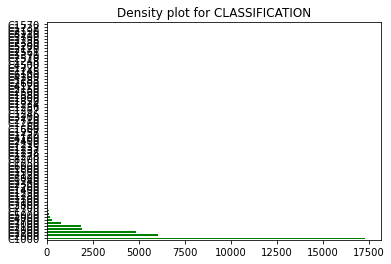

In [10]:
# Visualize the value counts of CLASSIFICATION
cln_application_df.CLASSIFICATION.value_counts().plot(kind="barh", color='green')
plt.title('Density plot for CLASSIFICATION')
plt.show()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list (class_type_counts[class_type_counts<50].index) 


# Replace in dataframe
for cls in replace_class:
    cln_application_df.CLASSIFICATION = cln_application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
cln_application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      391
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = cln_application_df.dtypes[cln_application_df.dtypes == "object"].index.tolist()
cln_application_df[application_cat].nunique()

NAME                      38
APPLICATION_TYPE          11
AFFILIATION                6
CLASSIFICATION            16
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(cln_application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_GAMMA THETA UPSILON,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
cln_application_df= cln_application_df.merge(encode_df, left_index=True, right_index=True)
cln_application_df= cln_application_df.drop(application_cat,1)
cln_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X=cln_application_df.drop(['IS_SUCCESSFUL'],1).values
y=cln_application_df["IS_SUCCESSFUL"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 40
hidden_nodes_layer4 = 20
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="swish")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               11280     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 25,041
Trainable params: 25,041
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt/",exist_ok=True)
checkpoint_path = "checkpoints_opt/weights.{epoch:02d}.hdf5"
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch",
period=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5072 - accuracy: 0.7442: 0s - loss: 0.5067 - accuracy
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4906 - accuracy: 0.7571: 1s - loss: 0.4881 - accuracy: 0.76 - E
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4859 - accuracy: 0.7582
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4827 - accuracy: 0.7610
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4818 - accuracy: 0.7612

Epoch 00005: saving model to checkpoints_opt/weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4784 - accuracy: 0.7645
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4784 - accuracy: 0.7614
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4769 - accuracy: 0.7635
Epoch 9/100
804/804 [==============================] - 2s 2m

804/804 [==============================] - 1s 1ms/step - loss: 0.4609 - accuracy: 0.7723
Epoch 73/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4601 - accuracy: 0.7711
Epoch 74/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4604 - accuracy: 0.7713
Epoch 75/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4602 - accuracy: 0.7731

Epoch 00075: saving model to checkpoints_opt/weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4609 - accuracy: 0.7712
Epoch 77/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4604 - accuracy: 0.7721
Epoch 78/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4602 - accuracy: 0.7720
Epoch 79/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4604 - accuracy: 0.7711
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4602 - accuracy: 0.7706

Epoch 00080: saving model to che

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4996 - accuracy: 0.7563
Loss: 0.49959230422973633, Accuracy: 0.7562682032585144


In [21]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")